In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [51]:
df = pd.read_csv('test.csv.csv')
df

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,18,64,115,True
3,3,108,282,18,67,125,True
4,4,136,286,35,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


## Question 1

In [52]:
req_df = df[['Birth Weight','Maternal Smoker']]
req_df

,Birth Weight,Maternal Smoker
0,120,False
1,113,False
2,128,True
3,108,True
4,136,False
...,...,...
1169,113,False
1170,128,False
1171,130,True
1172,125,False


In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
req_df['Maternal Smoker'] = le.fit_transform(req_df['Maternal Smoker'])

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_42563/1522281418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_df['Maternal Smoker'] = le.fit_transform(req_df['Maternal Smoker'])


In [54]:
req_df

,Birth Weight,Maternal Smoker
0,120,0
1,113,0
2,128,1
3,108,1
4,136,0
...,...,...
1169,113,0
1170,128,0
1171,130,1
1172,125,0


In [55]:
smoker_df = req_df[req_df['Maternal Smoker']==1]
smoker_df


,Birth Weight,Maternal Smoker
2,128,1
3,108,1
8,143,1
10,144,1
11,141,1
...,...,...
1162,143,1
1163,113,1
1164,109,1
1165,103,1


In [56]:
non_smoker_df = req_df[req_df['Maternal Smoker']==0]
non_smoker_df

,Birth Weight,Maternal Smoker
0,120,0
1,113,0
4,136,0
5,138,0
6,132,0
...,...,...
1168,132,0
1169,113,0
1170,128,0
1172,125,0


(1) Draw the histograms of the two distributions in the sample

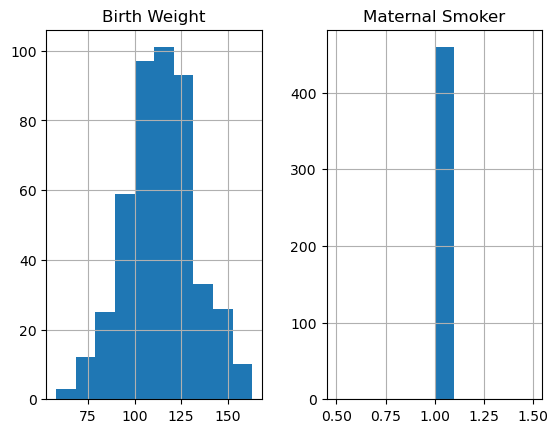

In [57]:
smoker_df.hist(histtype = 'stepfilled')
plt.show()

In [58]:
smoker_no = smoker_df['Birth Weight']
smoker_no

2       128
3       108
8       143
10      144
11      141
       ... 
1162    143
1163    113
1164    109
1165    103
1171    130
Name: Birth Weight, Length: 459, dtype: int64

In [59]:
non_smoker_no = non_smoker_df['Birth Weight']
non_smoker_no

0       120
1       113
4       136
5       138
6       132
       ... 
1168    132
1169    113
1170    128
1172    125
1173    117
Name: Birth Weight, Length: 715, dtype: int64

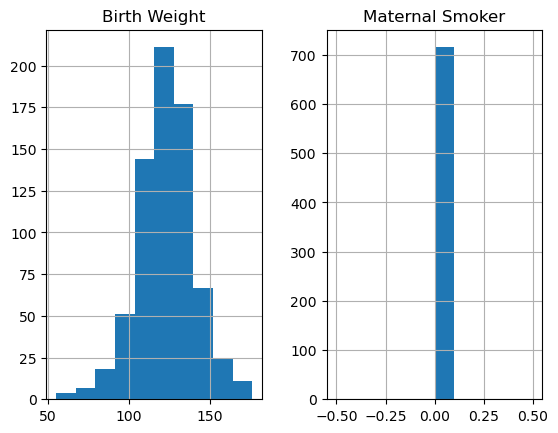

In [60]:
non_smoker_df.hist(histtype = 'stepfilled')
plt.show()

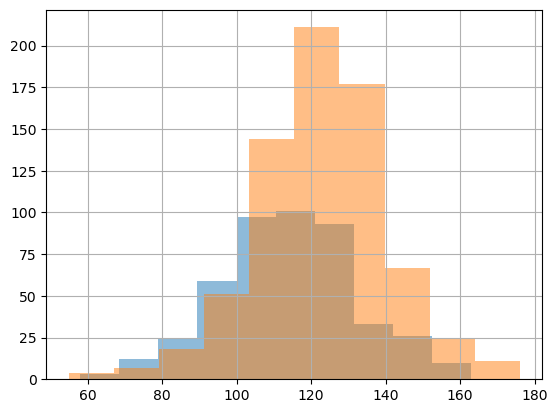

In [61]:
smoker_no.hist(alpha = 0.5)
non_smoker_no.hist(alpha = 0.5)
plt.show()

(2) Choose a suitable statistical test and State the Null and Alternative Hypothesis 

Answer : We can choose the difference between the mean of the weights of the smokers and the non-smokers as the test.The statistical test which we are going to use is AB testing .The hypothesis are:
Null hypothesis : There  is no difference between the weights of the babies of non-smokers and the weights of the babies of smokers
Alternative hypothesis : There is difference between the weights of the non-smokers and the smokers

(3) Choose the statistic to apply for this case

Answer : We can choose the difference between the mean of the weights of the smokers and the non-smokers as the test

(4) State the observed statistic

In [70]:
observed_diff = smoker_no.mean() - non_smoker_no.mean()
observed_diff

-9.266142572024918

(5) Simulate the test statistic under the Null that will help make the decision

Answer: We need to perform random permutation and plot its histogram to compare the observed statistic.The random permutation is used for getting the expected value

In [63]:
req_df

,Birth Weight,Maternal Smoker
0,120,0
1,113,0
2,128,1
3,108,1
4,136,0
...,...,...
1169,113,0
1170,128,0
1171,130,1
1172,125,0


In [64]:
shuffled = req_df.sample(1174)
shuffled


,Birth Weight,Maternal Smoker
225,111,0
203,121,1
735,86,1
947,122,0
718,144,0
...,...,...
679,110,0
239,81,1
488,158,0
359,126,1


In [65]:
diff_arr = []

In [66]:
for i in range(5000):
    shuffled = req_df.sample(1174)
    shuffled_weights = shuffled['Birth Weight']
    original_and_shuffled = req_df.assign(shuffled_weights = shuffled_weights.values)
    all_group_means = original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][1] - all_group_means['shuffled_weights'][0]
    diff_arr.append(difference)
diff_arr = np.array(diff_arr)

In [68]:
diff_arr = pd.DataFrame(diff_arr)

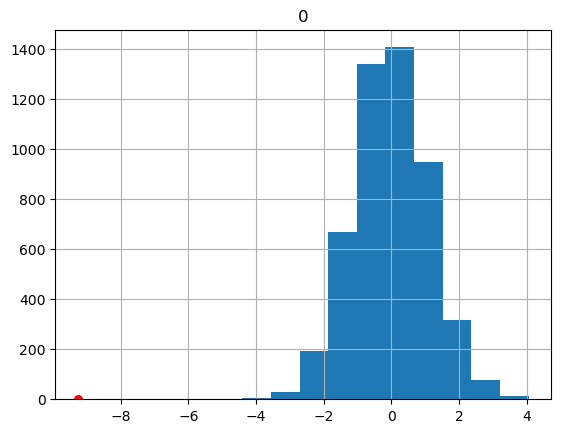

In [71]:
diff_arr.hist()
plt.scatter(observed_diff,0,s = 30,color = 'red')
plt.show()

In [72]:
p_value = np.count_nonzero(observed_diff>diff_arr)
p_value

0

In [73]:
if p_value > 0.05:
    print("Accept the null hypothesis")
else:
    print("Reject the null hypothesis")

Reject the null hypothesis


(6) State the outcome of the hypothesis test

Answer: As the p-value is zero(which is lesser than the significance level) we can reject the null hypothesis.Hence the birth weight of the children of smokers is lesser than the birth weight of the children of non-smokers

(7) Draw a histogram to depict what the model of random selection predicts about the statistic

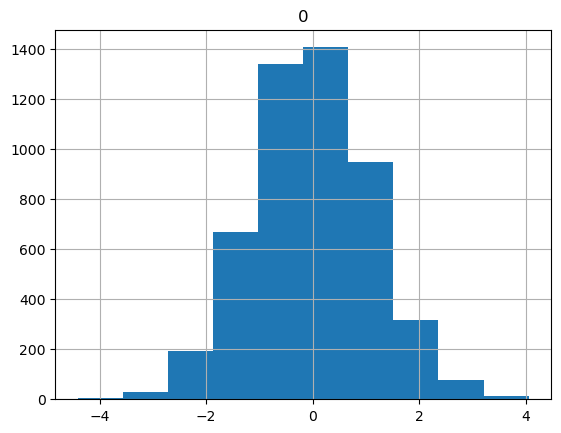

In [74]:
diff_arr.hist()
plt.show()

## Question 2

In [76]:
blood_group = {"Blood Type":['O+','A+','B+','AB+','Others'],"Blood percentage":[42,31,15,5,7],"Sample percentage":[35,30,13,8,14]}
blood_group = pd.DataFrame(blood_group)
blood_group

,Blood Type,Blood percentage,Sample percentage
0,O+,42,35
1,A+,31,30
2,B+,15,13
3,AB+,5,8
4,Others,7,14


(1) State the Null and Alternative Hypothesis

Null Hypothesis: The distribution of percentages of the blood samples of the aboriginal population group is not different from the distribution of the blood samples of the original population group.

Alternative Hypothesis:The distribution of percentages of the blood samples of the aboriginal population group is different from the distribution of the blood samples of the original population group

(2) Choose the statistic to apply for this case

We use hypothesis testing.Here we can subtract the sample percentages from the actual population blood percentage.Then we can take the absolute value and take the sum and divide it by 2.So we take the sum of absolute differences and then divide by 2

(3) State the observed statistic

In [80]:
blood_group['diff'] = blood_group['Sample percentage'] - blood_group['Blood percentage']
blood_group['abs diff']= abs(blood_group['diff'])
blood_group

,Blood Type,Blood percentage,Sample percentage,diff,abs diff
0,O+,42,35,-7,7
1,A+,31,30,-1,1
2,B+,15,13,-2,2
3,AB+,5,8,3,3
4,Others,7,14,7,7


In [83]:
observed_diff = blood_group['abs diff'].sum()/2
observed_diff

10.0

(4) Simulate the test statistic under the Null that will help make the decision

In [91]:
diff_arr = []
for i in range(5000):
    sample = (np.random.multinomial(1568,[0.42,0.31,0.15,0.05,0.07])/1568)*100
    a = abs(sample[0]-42)
    b = abs(sample[1]-31)
    c = abs(sample[2]-15)
    d = abs(sample[3]-5)
    e = abs(sample[4]-7)
    diff = (a+b+c+d+e)/2
    diff_arr.append(diff)
    

In [93]:
diff_arr = pd.DataFrame(diff_arr)

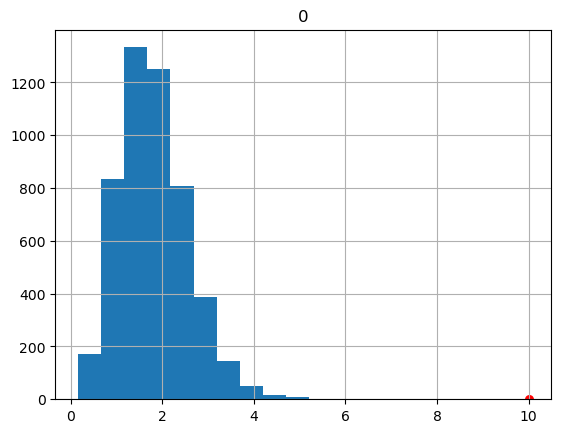

In [95]:
diff_arr.hist()
plt.scatter(observed_diff,0,color='red',s = 30)
plt.show()

In [97]:
p_value = np.count_nonzero(diff_arr > observed_diff)/diff_arr.size
p_value

0.0

In [98]:
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis


(5) What is the outcome of your analysis? 

We can reject the null hypothesis.Hence the  distribution of percentages of the blood samples of the aboriginal population group is different from the distribution of the blood samples of the original population group

(6) Draw a histogram to depict what the model of random selection predicts about the
statistic

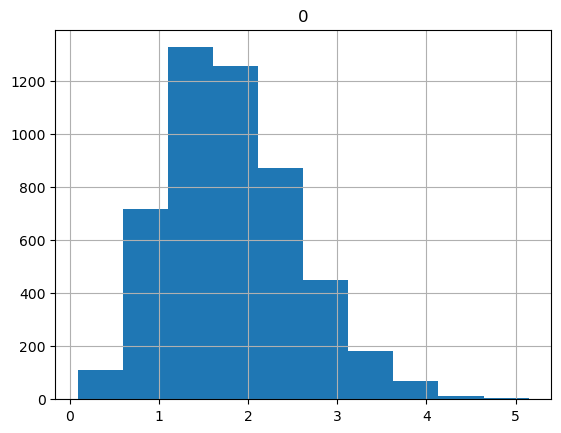

In [99]:
diff_arr = []
for i in range(5000):
    sample = (np.random.multinomial(1568,[0.42,0.31,0.15,0.05,0.07])/1568)*100
    a = abs(sample[0]-42)
    b = abs(sample[1]-31)
    c = abs(sample[2]-15)
    d = abs(sample[3]-5)
    e = abs(sample[4]-7)
    diff = (a+b+c+d+e)/2
    diff_arr.append(diff)
diff_arr = pd.DataFrame(diff_arr)
diff_arr.hist()
plt.show()